# Model Building

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
# #encoded_values = {'sleep_quality' : {'poor': 0, 'good': 2, 'average': 1},
#                    'facility_rating' : {'low': 0, 'medium': 1, 'high': 2},
#                     'exam_difficulty': {'easy': 0, 'moderate': 1, 'hard': 2}}

In [3]:
features = pd.read_csv(r"C:\Users\Ajay Gupta\Desktop\competitions\Student exam score\final_df.csv")
features.head()

,id,exam_score,study_hours,class_attendance,sleep_hours,sleep_quality_enc,facility_rating_enc,study_method_coaching,study_method_group_study,study_method_mixed,study_method_online_videos,study_method_self_study
0,0,78.3,7.91,98.8,4.9,1,0,0,0,0,1,0
1,1,46.7,4.95,94.8,4.7,0,1,0,0,0,0,1
2,2,99.0,4.68,92.6,5.8,0,2,1,0,0,0,0
3,3,63.9,2.00,49.5,8.3,1,2,0,1,0,0,0
4,4,100.0,7.65,86.9,9.6,2,2,0,0,0,0,1


In [4]:
features.shape, features.columns

((630000, 12),
 Index(['id', 'exam_score', 'study_hours', 'class_attendance', 'sleep_hours',
        'sleep_quality_enc', 'facility_rating_enc', 'study_method_coaching',
        'study_method_group_study', 'study_method_mixed',
        'study_method_online_videos', 'study_method_self_study'],
       dtype='object'))

## Data
Train test validate divide. 

In [5]:
# define dependent and independent variable 
id = features['id']
y = features['exam_score']
x = features.drop(columns= ['exam_score', 'id'])


In [6]:
x[1:2] ,y[1:2], id[1:2]

(   study_hours  class_attendance  sleep_hours  sleep_quality_enc  \
 1         4.95              94.8          4.7                  0   
 
    facility_rating_enc  study_method_coaching  study_method_group_study  \
 1                    1                      0                         0   
 
    study_method_mixed  study_method_online_videos  study_method_self_study  
 1                   0                           0                        1  ,
 1    46.7
 Name: exam_score, dtype: float64,
 1    1
 Name: id, dtype: int64)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# train and temp split
x_train, x_temp, y_train, y_temp, id_train, id_temp = train_test_split(
    x, y, id,
    test_size = 0.3, 
    random_state = 42, 
    stratify = y
)

In [10]:
x_val, x_test, y_val, y_test, id_val, id_test = train_test_split(
    x_temp, y_temp, id_temp,
    test_size = 0.5, 
    random_state = 42, 
    stratify = y_temp
)

In [11]:
print(x_train.shape, y_train.shape, id_train.shape)
print(x_test.shape, y_test.shape, id_test.shape)
print(x_val.shape, y_val.shape, id_val.shape)

(441000, 10) (441000,) (441000,)
(94500, 10) (94500,) (94500,)
(94500, 10) (94500,) (94500,)


In [12]:
y_train

178303    63.3
507958    68.3
86485     65.6
32895     34.1
330009    65.5
          ... 
223364    64.2
237575    61.6
199512    51.0
400909    91.9
124961    56.6
Name: exam_score, Length: 441000, dtype: float64

### Models which can be used:
1. Linear regression
2. Polynomial Regression
3. Neural Networks: RNN and its variations
4. Neural Networks: CNN
5. Naive Bayes Model
6. Vector Embedding then clustering
7. Decision Tree - CART or anything else
8. Ensemble technique. 


## Linear Regression



In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

In [14]:
lr = LinearRegression()
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
# Validation
val_preds = lr.predict(x_val)
val_rmse = root_mean_squared_error(y_val, val_preds)
val_r2 = r2_score(y_val, val_preds)

# Test
test_preds = lr.predict(x_test)
test_rmse = root_mean_squared_error(y_test, test_preds)
test_r2 = r2_score(y_test, test_preds)

print(f"Validation RMSE: {val_rmse:.3f}, R2: {val_r2:.3f}")
print(f"Test RMSE: {test_rmse:.3f}, R2: {test_r2:.3f}")


Validation RMSE: 8.893, R2: 0.779
Test RMSE: 8.907, R2: 0.778


In [19]:
test_results = pd.DataFrame({
    'id': id_test,
    'actual_exam_score': y_test,
    'predicted_exam_score': test_preds
})

test_results = test_results.sort_values('id').reset_index(drop=True)
print(test_results.head())


   id  actual_exam_score  predicted_exam_score
0  14               51.6             51.722468
1  19               94.3             82.181416
2  25               76.2             84.240055
3  26               91.2             99.371053
4  29               77.4             75.772587


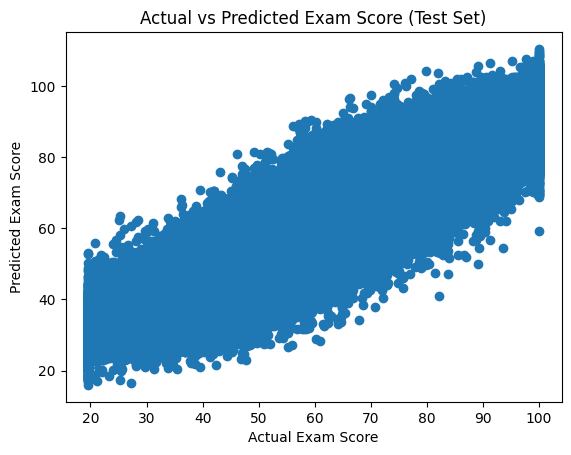

In [22]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, test_preds)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()]
)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Score (Test Set)")
plt.show()


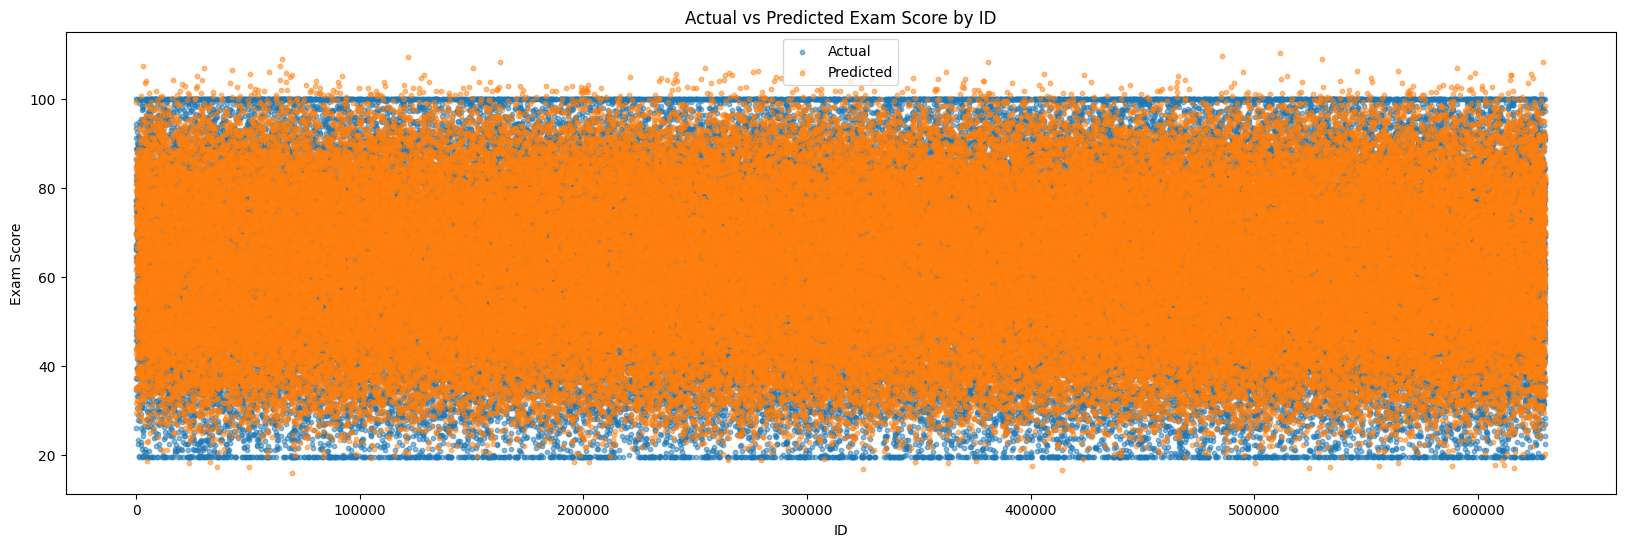

In [25]:
plt.figure(figsize=(20, 6))  # wider plot
plt.scatter(id_test, y_test, label="Actual", alpha=0.5, s=10)
plt.scatter(id_test, test_preds, label="Predicted", alpha=0.5, s=10)
plt.xlabel("ID")
plt.ylabel("Exam Score")
plt.title("Actual vs Predicted Exam Score by ID")
plt.legend()
plt.show()


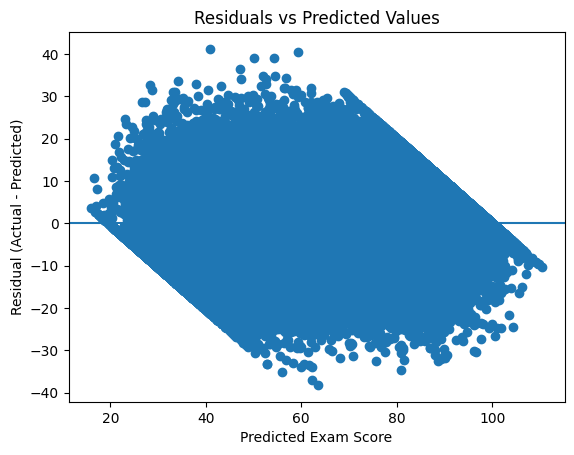

In [23]:
residuals = y_test - test_preds

plt.figure()
plt.scatter(test_preds, residuals)
plt.axhline(0)
plt.xlabel("Predicted Exam Score")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Predicted Values")
plt.show()


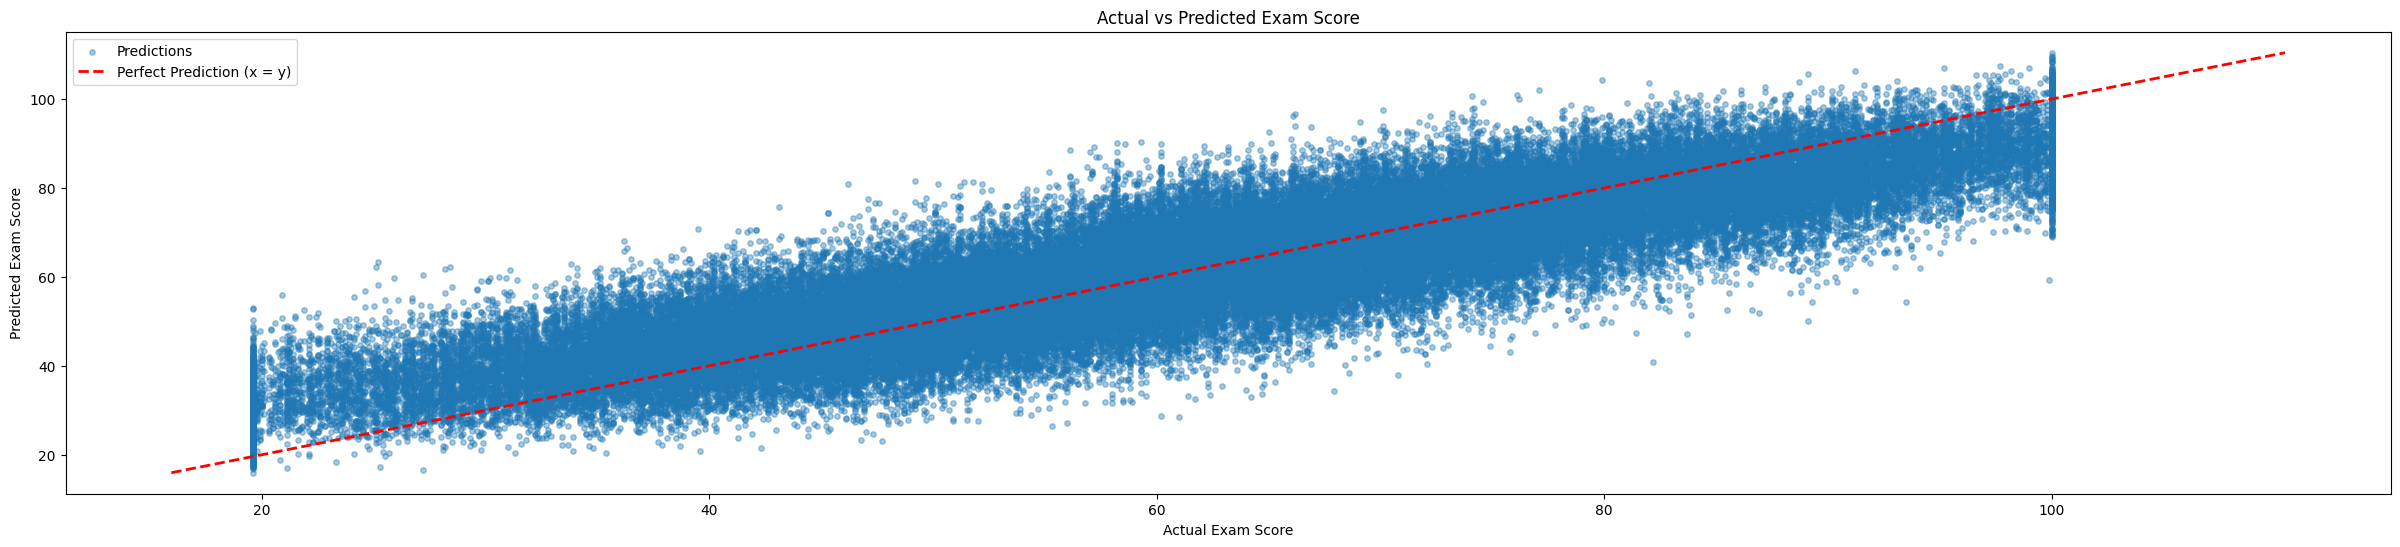

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 6))

# Scatter points
plt.scatter(y_test, test_preds, alpha=0.4, s=15, label="Predictions")

# x = y line (reference line)
min_val = min(y_test.min(), test_preds.min())
max_val = max(y_test.max(), test_preds.max())

plt.plot(
    [min_val, max_val],
    [min_val, max_val],
    color='red',        # 👈 different color
    linewidth=2,
    linestyle='--',
    label='Perfect Prediction (x = y)'
)

plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Score")
plt.legend()
plt.show()


## Polynomial regression

In [33]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score


In [30]:
degree = 2  # start with 2

poly_model = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('lr', LinearRegression())
])


In [31]:
poly_model.fit(x_train, y_train)


,steps,"[('scaler', ...), ('poly', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,degree,2
,interaction_only,False
,include_bias,False
,order,'C'


In [34]:
# Validation
val_preds_poly = poly_model.predict(x_val)
val_rmse_poly = root_mean_squared_error(y_val, val_preds_poly)
val_r2_poly = r2_score(y_val, val_preds_poly)

# Test
test_preds_poly = poly_model.predict(x_test)
test_rmse_poly = root_mean_squared_error(y_test, test_preds_poly)
test_r2_poly = r2_score(y_test, test_preds_poly)

print(f"Polynomial (deg={degree}) Val RMSE: {val_rmse_poly:.3f}, R2: {val_r2_poly:.3f}")
print(f"Polynomial (deg={degree}) Test RMSE: {test_rmse_poly:.3f}, R2: {test_r2_poly:.3f}")


Polynomial (deg=2) Val RMSE: 8.887, R2: 0.779
Polynomial (deg=2) Test RMSE: 8.901, R2: 0.779


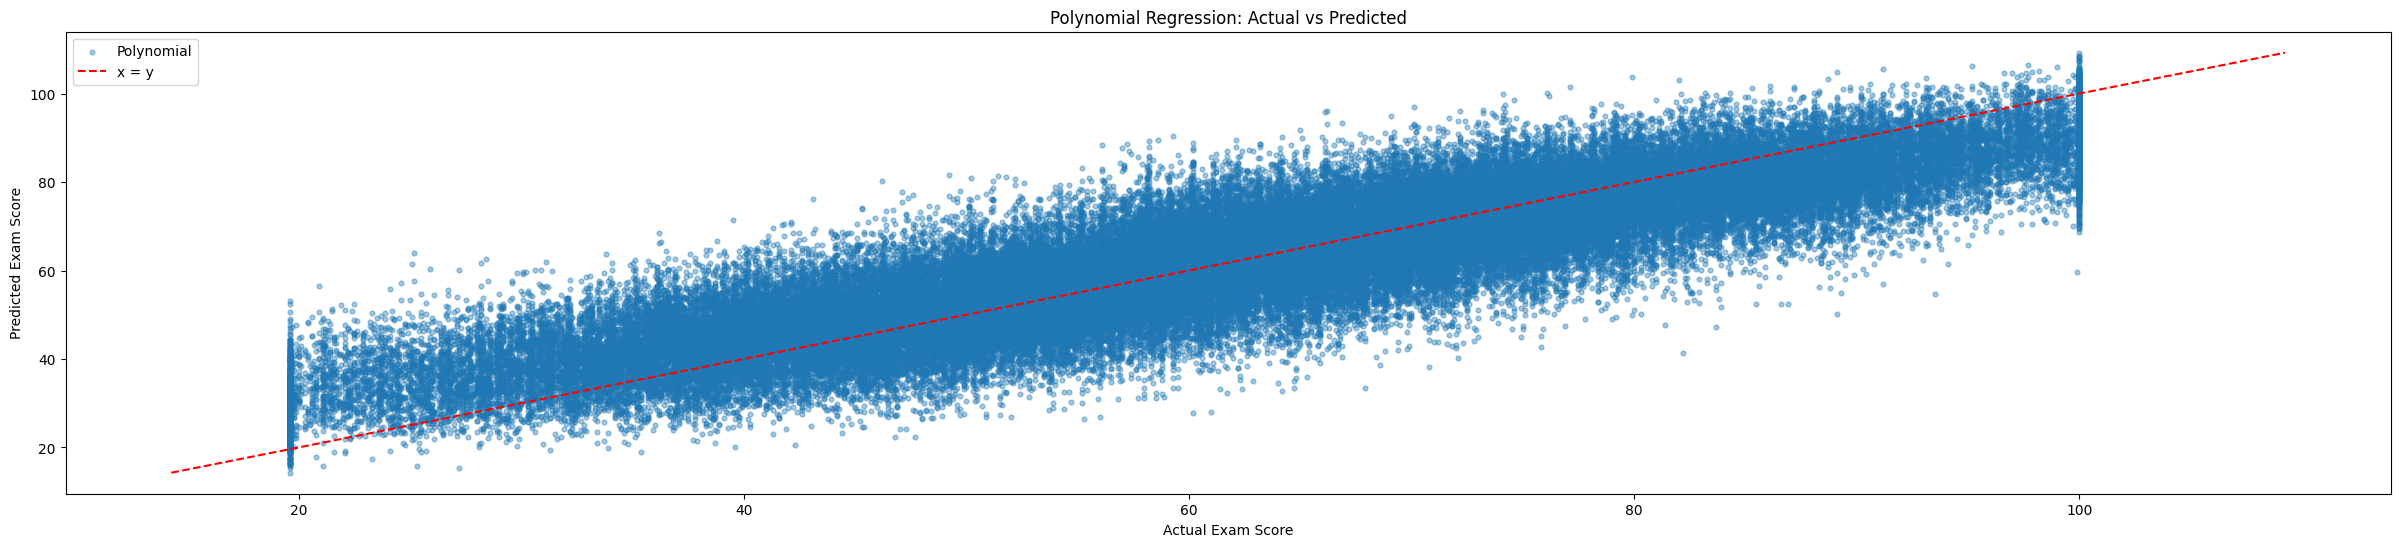

In [36]:
plt.figure(figsize=(30, 6))

# Polynomial predictions
plt.scatter(y_test, test_preds_poly, alpha=0.4, s=12, label="Polynomial")

# Perfect line
min_val = min(y_test.min(), test_preds_poly.min())
max_val = max(y_test.max(), test_preds_poly.max())

plt.plot([min_val, max_val], [min_val, max_val],
         color='red', linestyle='--', label='x = y')

plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Polynomial Regression: Actual vs Predicted")
plt.legend()
plt.show()
